In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Creating dummies for categorical feature ocean_proximity

df = pd.get_dummies(df, columns=['ocean_proximity'])
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


In [4]:
# Displaying null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  bool   
 10  ocean_proximity_INLAND      20640 non-null  bool   
 11  ocean_proximity_ISLAND      20640 non-null  bool   
 12  ocean_proximity_NEAR BAY    20640 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  206

In [ ]:
# The rooms data is represented in total rooms
df = df.drop(['total_bedrooms'], axis = 1)

In [6]:
from sklearn.preprocessing import StandardScaler
# Standrizing
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df_scaled.select_dtypes(include='number').columns] = scaler.fit_transform(df_scaled.select_dtypes(include='number'))

In [7]:
X = df_scaled.drop('median_house_value', axis = 1)
Y = df_scaled['median_house_value']

In [8]:
models = {}
scores = []

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
# Splitting data to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)
models['LR'] = LinearRegression()
models['LR'].fit(X_train, Y_train)

Y_pred_LR = models['LR'].predict(X_test)
scores.append(mean_squared_error(Y_test, Y_pred_LR))
scores[-1]

0.35784482566772835

This means that the model is doing ok

In [10]:
from sklearn.preprocessing import PolynomialFeatures

# Finding numerical columns from X
numerical_cols = X.select_dtypes(include='number').columns

poly = PolynomialFeatures(degree=2)
X_poly_numerical = poly.fit_transform(X[numerical_cols])

X_poly = pd.DataFrame(X_poly_numerical, columns=poly.get_feature_names_out(numerical_cols)) # Making data frame of the poly components
X_poly = pd.concat([X_poly, X.drop(columns=numerical_cols)], axis=1) # Adding categorical columns

X_train, X_test, Y_train, Y_test = train_test_split(X_poly, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    random_state=0)
models['PR'] = LinearRegression()
models['PR'].fit(X_train, Y_train)

Y_pred_PR = models['PR'].predict(X_test)
scores.append(mean_squared_error(Y_test, Y_pred_PR))
scores

[0.35784482566772835, 0.3085054416683405]

Polynomial regression is doing slighly better than Linear regression

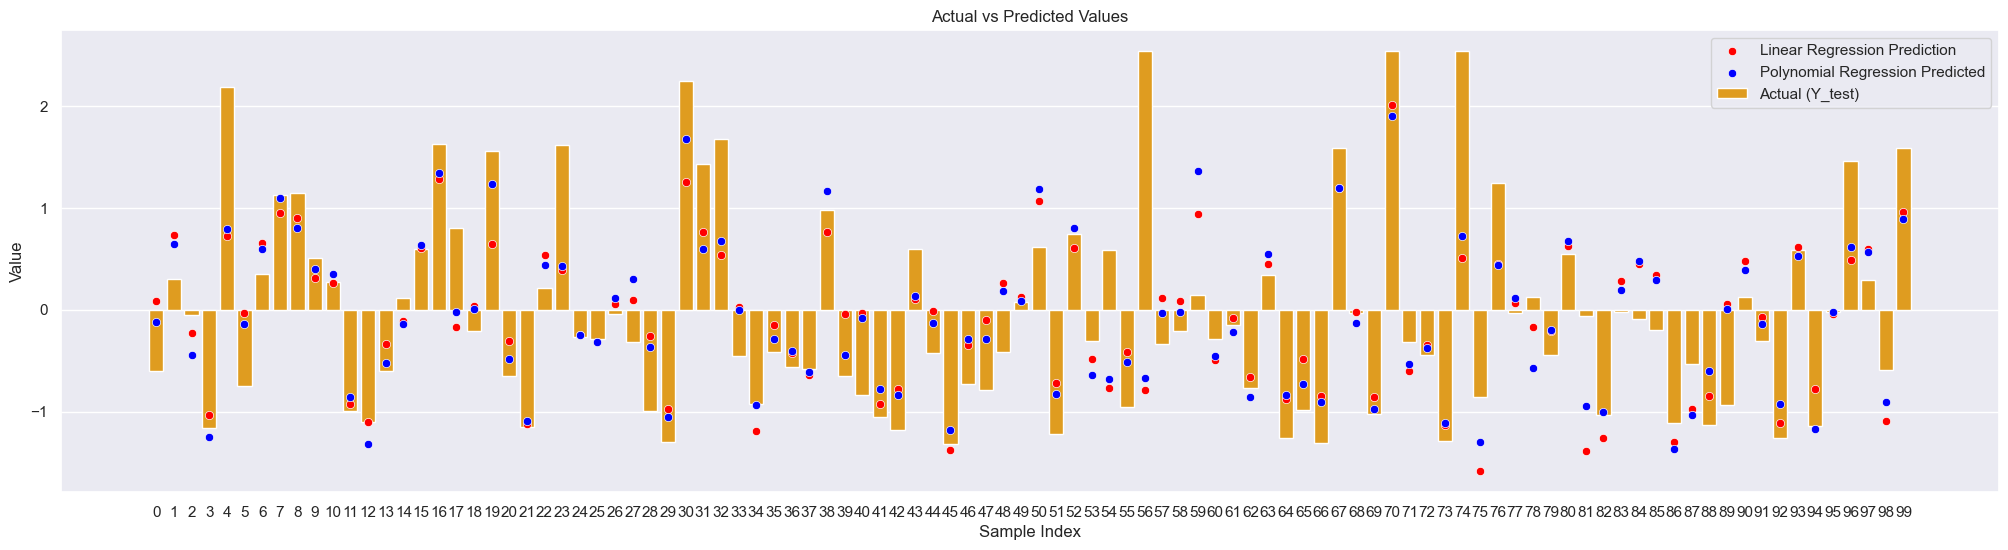

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Nice idea right?

sns.set_theme(style="darkgrid")
plt.figure(figsize=(25, 6))
# Using Samples
sns.barplot(x=np.arange(100), y=Y_test[:100], label="Actual (Y_test)", color='orange')
sns.scatterplot(x=np.arange(100), y=Y_pred_LR[:100], label="Linear Regression Prediction", color='red')
sns.scatterplot(x=np.arange(100), y=Y_pred_PR[:100], label="Polynomial Regression Predicted", color='blue')

plt.title("Actual vs Predicted Values")
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()

C:\Users\ahmad\AppData\Local\Temp\ipykernel_33756\2226014405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Linear Regression', 'Polynomial Regression'],


Text(0, 0.5, 'MSE')

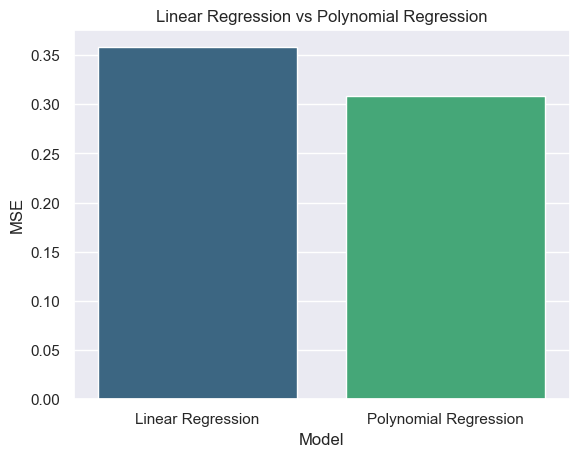

In [18]:
sns.barplot(x=['Linear Regression', 'Polynomial Regression'], 
            y=scores, 
            palette='viridis')

plt.title("Linear Regression vs Polynomial Regression")
plt.xlabel("Model")
plt.ylabel("MSE")